<a href="https://colab.research.google.com/github/thelonesaiyan/Machine_Learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST


In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(train_samples, train_labels), (test_samples, test_labels) = mnist.load_data()

In [52]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Range of Values

In [53]:
import numpy as np

np.amax(train_samples) # max_value

255

In [54]:
np.amin(train_samples) # min_value

0

Label of image is  5


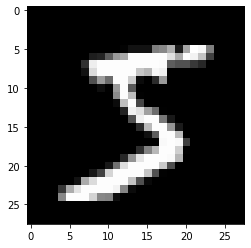

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

pic = train_samples[0]
plt.imshow(pic , cmap = 'gray')

print("Label of image is ", train_labels[0])

Data preparation

 ### Normalize inputs (0, 1)

In [0]:
# convert datatype
train_samples = train_samples.astype('float32')
test_samples = test_samples.astype('float32')

In [57]:
# Normalize inputs
train_samples = train_samples/255
test_samples = test_samples/255
np.amax(train_samples)  # max value has become 1.0

print(train_samples.shape)

(60000, 28, 28)


In [58]:
# reshape input to be a column vector
train_samples = train_samples.reshape(train_samples.shape[0], 28 * 28)
print(train_samples.shape)
test_samples = test_samples.reshape(test_samples.shape[0], 28 * 28)
print(test_samples.shape)

(60000, 784)
(10000, 784)


### Convert o/p in 1-hot vectors

In [59]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Network architecture

#### softmax activation

In [0]:
from tensorflow.keras.layers import Dense, Input

input_layer = Input(shape = train_samples.shape[1:])
hidden_layer = Dense(512, activation = 'sigmoid')(input_layer)
output_layer = Dense(10, activation = 'softmax')(hidden_layer)

#### Loss = categorical Cross Entropy

In [64]:
# Model defintion
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

model = Model(input_layer, output_layer)
model.compile(optimizer = optimizers.Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [65]:
history  = model.fit(train_samples, train_labels, validation_split = 0.1, epochs = 100, batch_size = 200)

Epoch 1/100
270/270 [==============================] - 3s 11ms/step - loss: 4.7688e-06 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.9850
Epoch 2/100
270/270 [==============================] - 3s 11ms/step - loss: 5.7125e-04 - accuracy: 0.9998 - val_loss: 0.1113 - val_accuracy: 0.9832
Epoch 3/100
270/270 [==============================] - 3s 10ms/step - loss: 4.4797e-05 - accuracy: 1.0000 - val_loss: 0.1036 - val_accuracy: 0.9847
Epoch 4/100
270/270 [==============================] - 3s 10ms/step - loss: 1.2899e-05 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9840
Epoch 5/100
270/270 [==============================] - 3s 10ms/step - loss: 8.9142e-06 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 0.9840
Epoch 6/100
270/270 [==============================] - 3s 10ms/step - loss: 7.5587e-06 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 0.9843
Epoch 7/100
270/270 [==============================] - 3s 10ms/step - loss: 6.7033e-06 - accuracy: 1.0000 - val_

In [66]:
from sklearn.metrics import confusion_matrix
loss, accuracy = model.evaluate(test_samples, test_labels, verbose = 0) # evaluate model

print('Accuracy:%0.3f'%accuracy)

pred_labels = model.predict(test_samples)
cm = confusion_matrix(test_labels.argmax(axis = 1), pred_labels.argmax(axis = 1))

print(cm)

Accuracy:0.982
[[ 971    0    2    0    1    1    3    1    1    0]
 [   0 1124    3    1    0    1    2    1    3    0]
 [   2    1 1015    3    1    0    2    4    3    1]
 [   0    0    2  996    0    3    0    4    2    3]
 [   2    0    0    1  966    0    5    0    1    7]
 [   3    0    0    8    1  869    3    0    5    3]
 [   5    2    1    1    3    5  940    0    1    0]
 [   1    3    9    4    1    0    0 1008    1    1]
 [   4    0    0    4    6    2    2    3  950    3]
 [   1    2    0    5    7    4    0    3    2  985]]


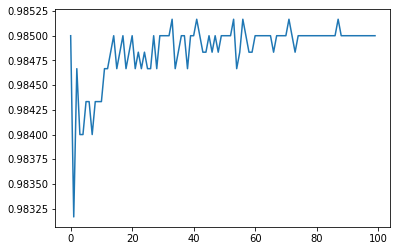

In [72]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.show()